<a href="https://colab.research.google.com/github/phu0n9/BigData_movie/blob/master/statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing library

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import colors
import sklearn as sk
import datetime
import sys

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Data

In [ ]:
final_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/movies.csv", delimiter=",")
genre_point_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/genre_point.csv", delimiter=",")
genre_point_df['Month'] = genre_point_df['Month'].replace(regex=[r' ',r'\[',r'\]'], value='')

## Modifying data

In [ ]:
conditions = [(final_df['ROI'] < 0), 
              ((final_df['ROI'] >= 0) & (final_df['ROI'] < 100)), 
              ((final_df['ROI'] >= 100) & (final_df['ROI'] < 1000)), 
              (final_df['ROI'] >= 1000)]
choices = [0, 1, 2, 3]
final_df['categorized_ROI'] = np.select(conditions, choices, default=0)

In [ ]:
final_df

,imdb_id,title,original_title,date_published,duration,revenue,year,popularity,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,genre_list,genre_count,Comedy,Crime,Drama,War,Horror,Adventure,Animation,Action,Biography,Western,Family,Thriller,Mystery,Musical,Fantasy,Sci-Fi,Romance,Documentary,History,Sport,Music,Month,Day,budget,profit,ROI,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,overview_count,ROI_group,is_original_title,users_or_critics,categorized_ROI
0,tt0035423,Kate & Leopold,Kate & Leopold,2002-04-05,118,76019048,2002,7.196356,3.0,8.779866,1.0,7.776708,2.0,11.836761,6.0,4.732223,"Comedy,Fantasy,Romance",3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,5,4.800000e+07,2.801905e+07,58.373017,75298,6.6,7.0,6.6,14001.0,6.3,34645.0,6.4,10970.0,6.3,34237.0,6.5,5506.0,6.2,20307.0,6.3,7378.0,6.6,26707.0,6.7,8302.0,6.4,13963.0,6.7,3407.0,6.4,14442.0,6.3,37733.0,64.0,1,1,1,1
1,tt0053604,The Apartment,The Apartment,1960-09-16,125,177066,1960,11.994281,3.0,8.750395,1.0,6.817179,1.0,5.980728,5.0,4.309660,"Comedy,Drama,Romance",3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9,16,3.000000e+06,-2.822934e+06,-94.097800,148964,8.1,8.0,8.4,27231.0,8.2,56812.0,8.2,26369.0,8.3,91648.0,8.5,21040.0,8.2,45898.0,8.2,21259.0,8.1,21933.0,8.2,5918.0,8.1,10346.0,8.1,4730.0,8.3,31884.0,8.2,66596.0,61.0,0,1,1,0
2,tt0054098,Mughal-E-Azam,Mughal-E-Azam,1960-08-05,197,161434,1960,0.283219,2.0,0.283219,2.0,0.283219,1.0,0.283219,5.0,0.169931,"Drama,Romance,War",3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,5,7.142850e+07,-7.126707e+07,-99.773992,6484,8.4,9.0,8.5,1654.0,8.2,2606.0,7.3,463.0,8.3,4503.0,8.5,1500.0,8.2,2363.0,7.3,361.0,8.2,506.0,8.7,146.0,7.9,229.0,7.5,98.0,7.9,614.0,8.3,3005.0,57.0,0,1,1,0
3,tt0054167,Peeping Tom,Peeping Tom,1960-05-16,101,24640,1960,7.229587,1.0,2.841957,3.0,6.910720,1.0,7.229587,5.0,3.396453,"Drama,Horror,Thriller",3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,16,4.821431e+04,-2.357431e+04,-48.894835,27880,7.7,8.0,7.9,4783.0,7.6,12000.0,7.5,5459.0,7.7,19512.0,7.9,3884.0,7.7,10368.0,7.5,4771.0,7.6,3056.0,7.6,856.0,7.5,1502.0,7.6,602.0,7.7,6529.0,7.6,14265.0,83.0,0,1,1,0
4,tt0054177,Le petit soldat,Le petit soldat,1963-01-25,88,24296,1963,2.394441,3.0,3.362132,1.0,4.749160,1.0,5.170497,5.0,2.656358,"War,Drama",2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,1.800000e+05,-1.557040e+05,-86.502222,5405,7.3,7.0,7.5,1222.0,7.2,2101.0,7.0,949.0,7.2,3630.0,7.5,923.0,7.2,1821.0,6.8,794.0,7.4,709.0,7.3,281.0,7.1,261.0,7.8,143.0,7.2,1035.0,7.3,2902.0,56.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,tt6265828,A Ghost Story,A Ghost Story,2017-08-11,92,1951683,2017,24.339781,2.0,16.129907,2.0,18.383806,1.0,18.264861,5.0,10.555715,"Drama,Fantasy,Romance",3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,8,11,1.000000e+05,1.851683e+06,1851.683000,49515,6.8,7.0,7.3,13622.0,6.6,16136.0,6.0,4921.0,6.8,30840.0,7.4,10956.0,6.6,13441.0,6.1,4117.0,6.6,6190.0,7.0,2444.0,6.4,2442.0,5.9,712.0,7.0,7351.0,6.7,21432.0,46.0,1,1,1,3
9278,tt6389344,Tri bogatyrya i Morskoy tsar,Tri bogatyrya i Morskoy tsar,2017-01-01,75,13816357,2017,0.468664,4.0,2.559049,0.0,0.000000,1.

# General data statistic

### year vs movie count

In [ ]:
year_movie = final_df['year'].value_counts().to_frame().rename(columns={'year':'movie_count'})
year_movie['year'] = year_movie.index
year_movie.reset_index(drop=True,inplace=True)
year_movie.head()

,movie_count,year
0,544,2008
1,426,2013
2,425,2014
3,425,2012
4,423,2010


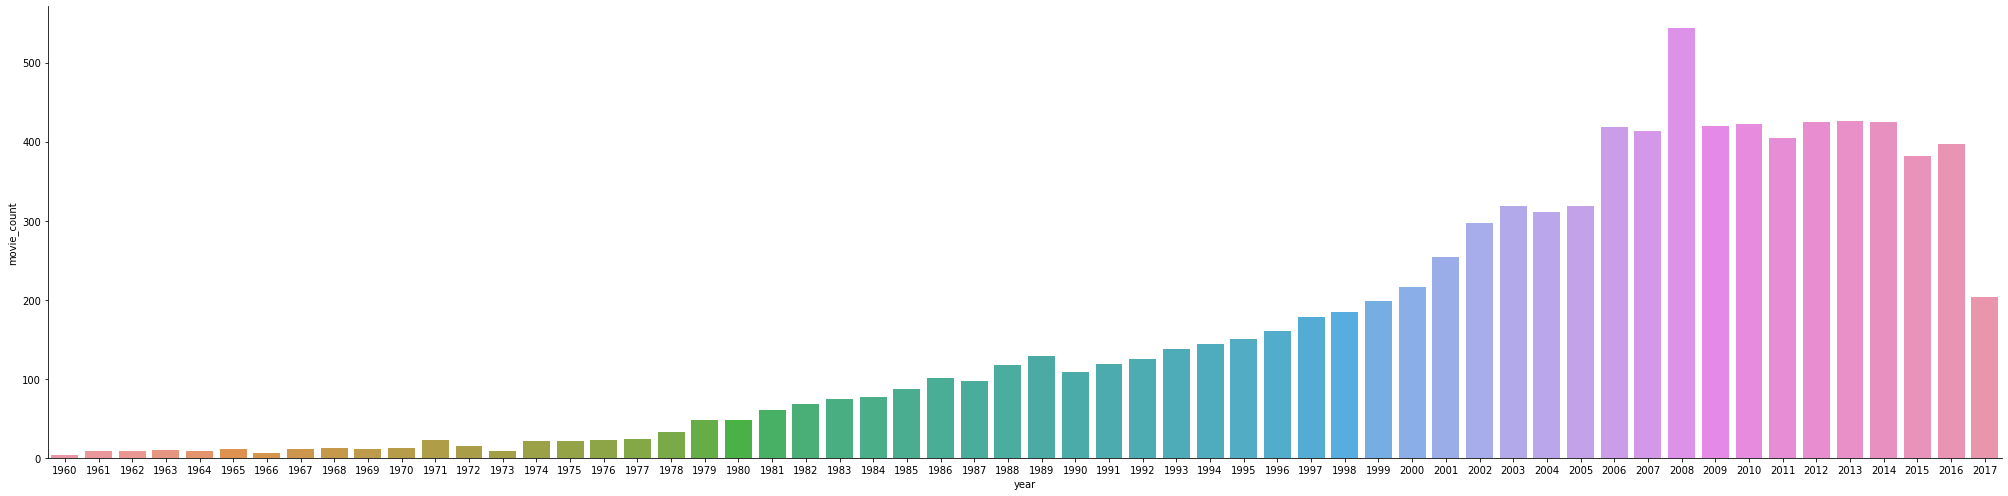

In [ ]:
sns.catplot(x='year',y='movie_count',data=year_movie,kind='bar',height=7,aspect=4)

### month vs movie count

In [ ]:
month_movie = final_df['Month'].value_counts().to_frame().rename(columns={'Month':'movie_count'})
month_movie['Month'] = month_movie.index
month_movie.reset_index(drop=True,inplace=True)
month_movie

,movie_count,Month
0,911,10
1,892,9
2,830,3
3,822,4
4,808,8
5,791,1
6,780,2
7,765,12
8,707,11
9,669,5


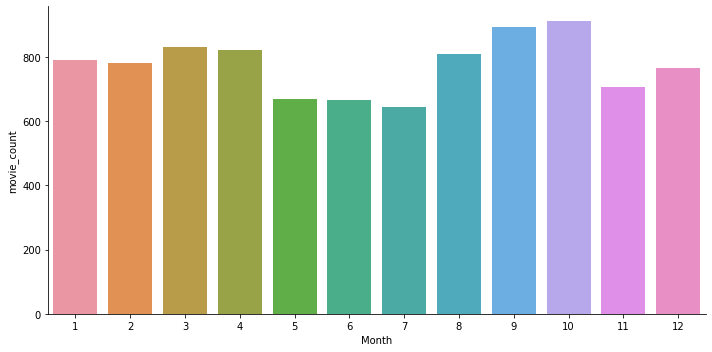

In [ ]:
sns.catplot(x='Month',y='movie_count',data=month_movie,kind='bar',height=5,aspect=2)

### Day vs movie count

In [ ]:
day_movie = final_df['Day'].value_counts().to_frame().rename(columns={'Day':'movie_count'})
day_movie['Day'] = day_movie.index
day_movie.reset_index(drop=True,inplace=True)
day_movie.head()

,movie_count,Day
0,444,26
1,382,1
2,337,27
3,331,12
4,331,21


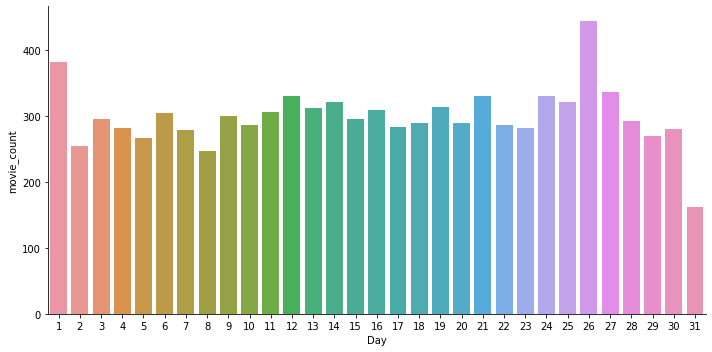

In [ ]:
sns.catplot(x='Day',y='movie_count',data=day_movie,kind='bar',height=5,aspect=2)

*** 
`end of general data statistic`
***

# More specific statistic

## Year

### `year vs categorized ROI`

In [ ]:
year_ROI = final_df.groupby('year',as_index=False)['categorized_ROI'].sum()
year_ROI.head()

,year,categorized_ROI
0,1960,0
1,1961,10
2,1962,4
3,1963,4
4,1964,10


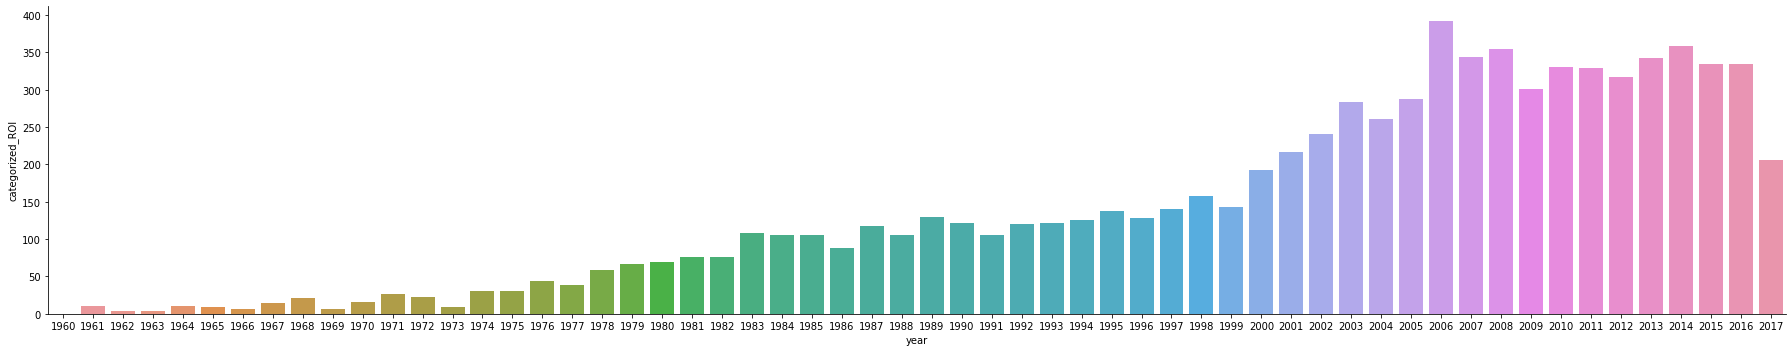

In [ ]:
sns.catplot(x='year',y='categorized_ROI',data=year_ROI,kind='bar',height=5,aspect=5)

### `year vs duration`

In [ ]:
year_duration = final_df.groupby('year',as_index=False)['duration'].mean()
year_duration.head()

,year,duration
0,1960,131.500000
1,1961,115.444444
2,1962,122.777778
3,1963,140.800000
4,1964,106.555556


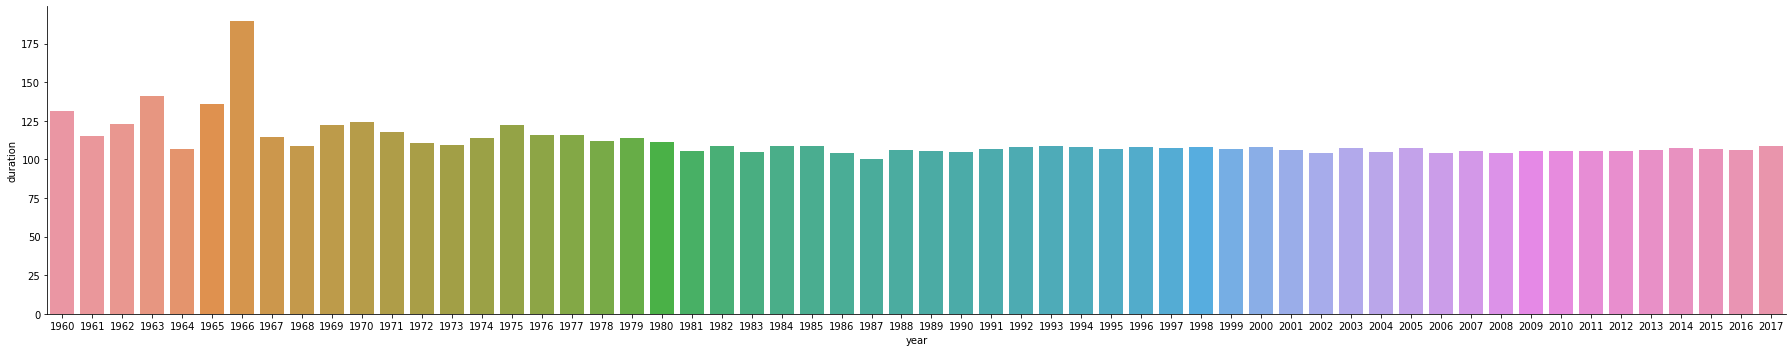

In [ ]:
sns.catplot(x='year',y='duration',data=year_duration,kind='bar',height=5,aspect=5)

### `year vs popularity`

In [ ]:
year_popularity = final_df.groupby('year',as_index=False)['popularity'].sum()
year_popularity.head()

,year,popularity
0,1960,31.561443
1,1961,91.940579
2,1962,73.454471
3,1963,89.255349
4,1964,63.067817


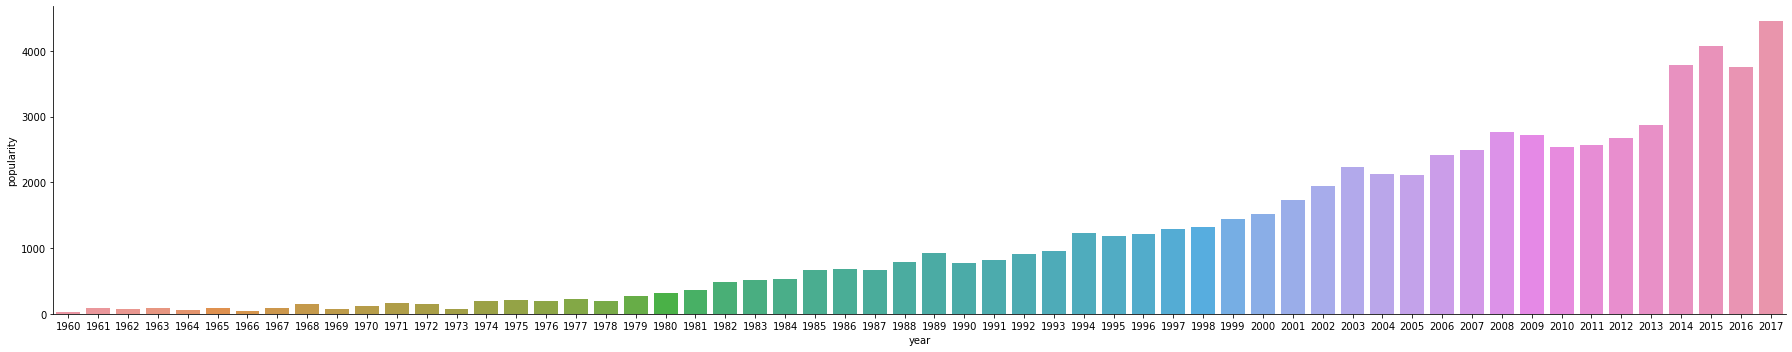

In [ ]:
sns.catplot(x='year',y='popularity',data=year_popularity,kind='bar',height=5,aspect=5)

### `Year vs average vote`

In [ ]:
year_vote = final_df.groupby('year',as_index=False)['total_votes'].mean()
year_vote.head()

,year,total_votes
0,1960,54273.000000
1,1961,115079.666667
2,1962,52906.666667
3,1963,100753.600000
4,1964,55125.111111


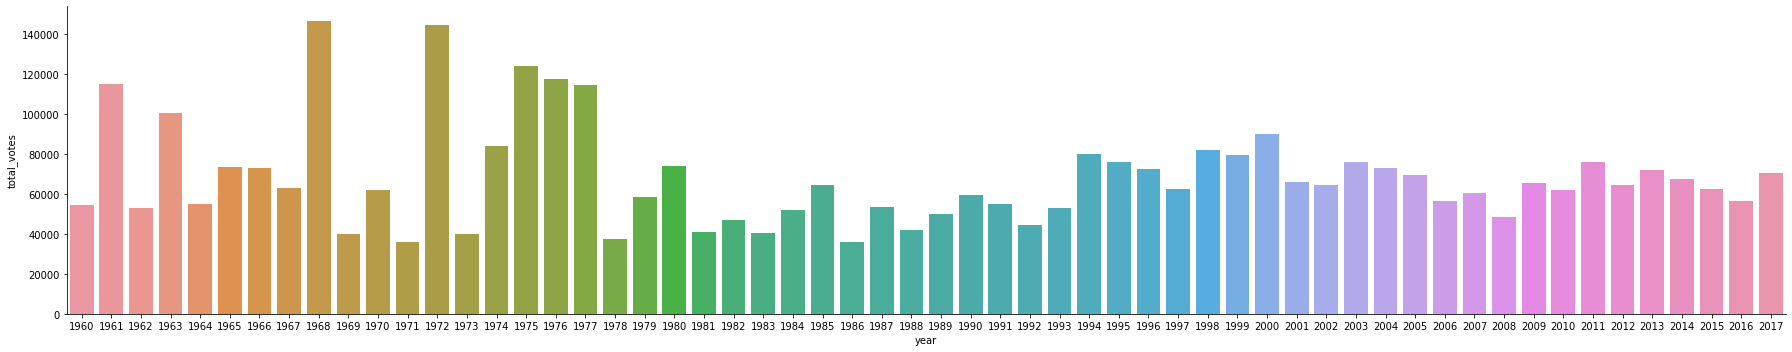

In [ ]:
sns.catplot(x='year',y='total_votes',data=year_vote,kind='bar',height=5,aspect=5)

### `year vs crew count`

In [ ]:
year_crew = final_df.groupby('year',as_index=False)['crew_count'].sum()
year_crew.head()

,year,crew_count
0,1960,20.0
1,1961,48.0
2,1962,46.0
3,1963,54.0
4,1964,48.0


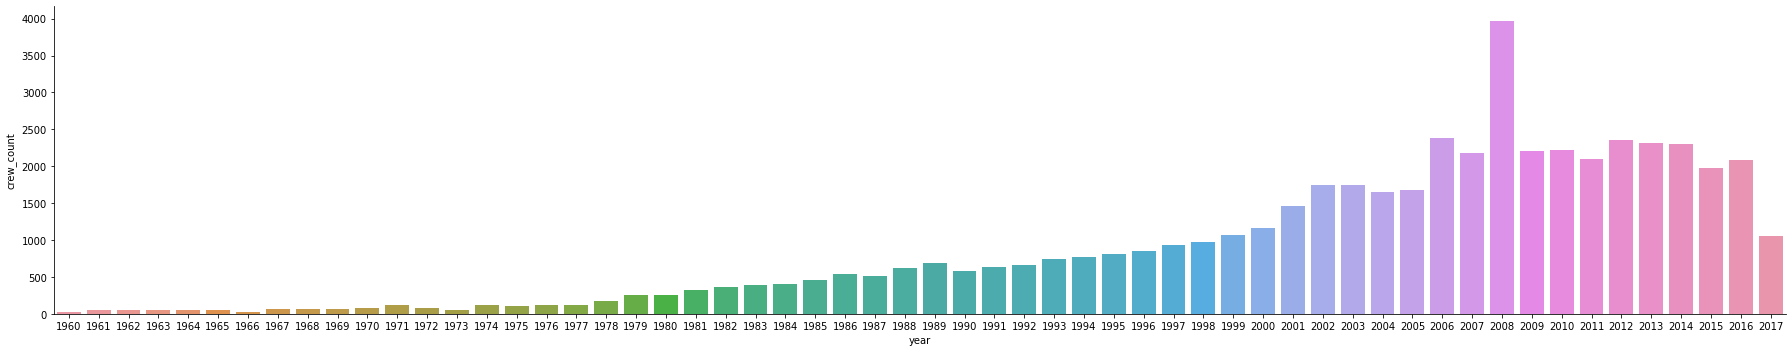

In [ ]:
sns.catplot(x='year',y='crew_count',data=year_crew,kind='bar',height=5,aspect=5)

### `year vs actor/actress count`

In [ ]:
year_actress_actor = final_df.groupby('year').apply(max).loc[:, ('actor_movie_count','actress_movie_count')]
year_actress_actor['year'] = year_actress_actor.index
year_actress_actor.head()

,actor_movie_count,actress_movie_count,year
year,,,
1960,3.0,3.0,1960
1961,3.0,2.0,1961
1962,3.0,3.0,1962
1963,4.0,3.0,1963
1964,5.0,3.0,1964


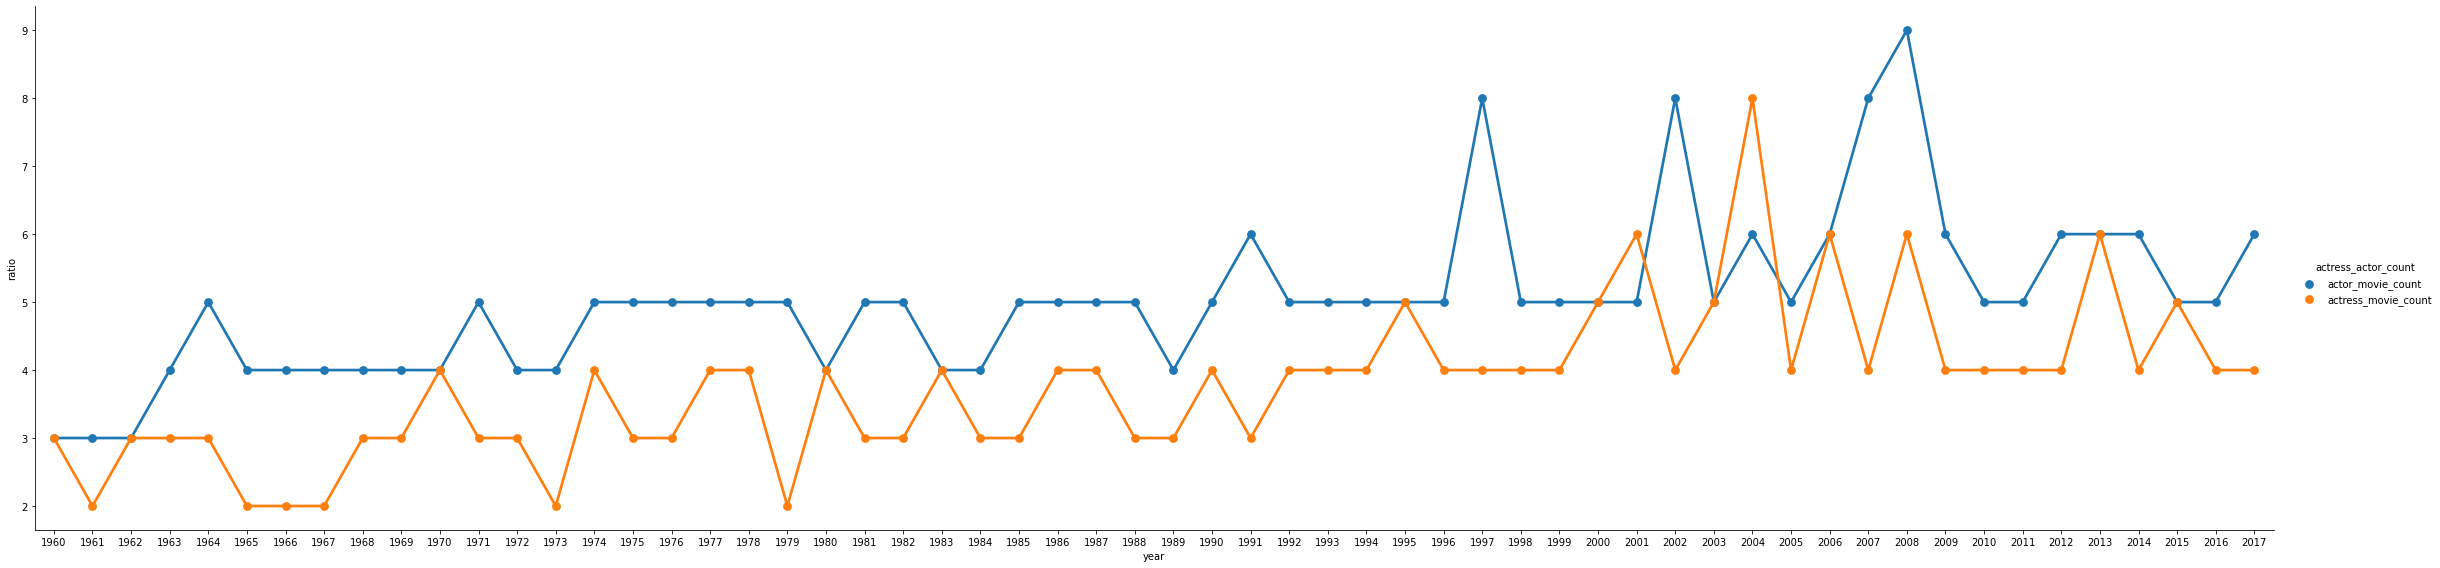

In [ ]:
year_actress_actor = year_actress_actor.melt('year', var_name='actress_actor_count',  value_name='ratio')
sns.catplot(x='year', y="ratio", hue='actress_actor_count', data=year_actress_actor,height=8, aspect=4,kind='point')

## ROI

### `ROI vs year`

In [ ]:
year_ROI = final_df.groupby('year',as_index=False)['ROI'].mean()
year_ROI.head()

,year,ROI
0,1960,-85.494924
1,1961,1125.820733
2,1962,86.323354
3,1963,-40.010016
4,1964,325.439845


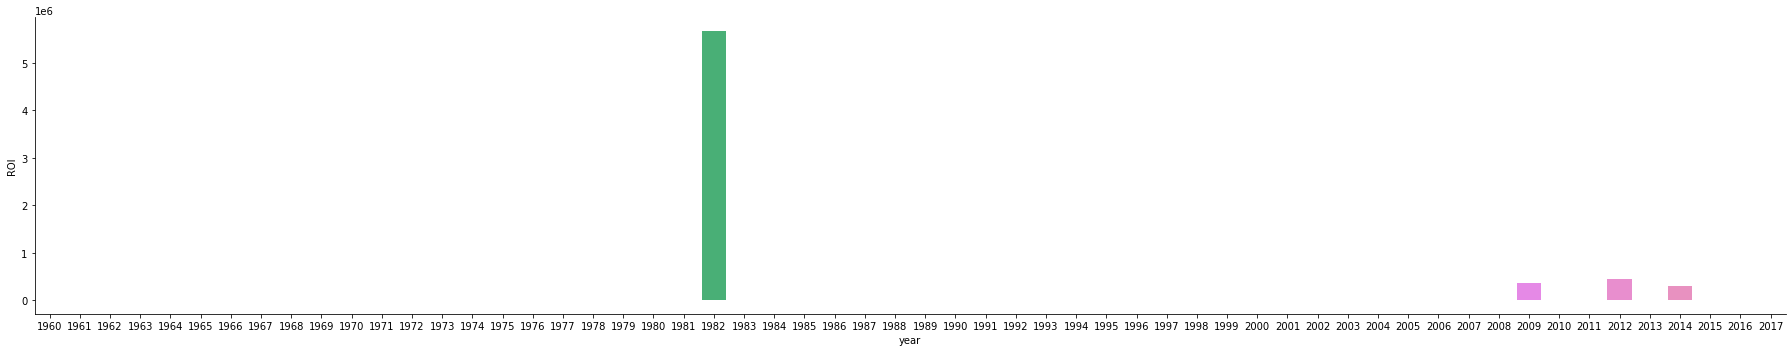

In [ ]:
sns.catplot(x='year',y='ROI',data=year_ROI,kind='bar',height=5,aspect=5)

### `ROI vs month`

In [ ]:
month_ROI = final_df.groupby('Month',as_index=False)['ROI'].mean()
month_ROI

,Month,ROI
0,1,178.280574
1,2,245732.476829
2,3,261.045246
3,4,516.374400
4,5,678.320709
5,6,290.009900
6,7,281.880134
7,8,166.715679
8,9,432731.016576
9,10,310172.372931


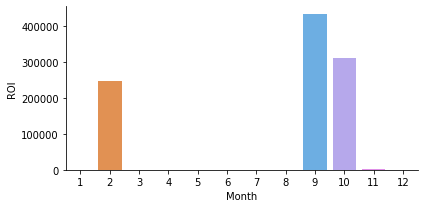

In [ ]:
sns.catplot(x='Month',y='ROI',data=month_ROI,kind='bar',height=3,aspect=2)

### `ROI vs Day`

In [ ]:
ROI_day = final_df.groupby('Day',as_index=False)['ROI'].mean()
ROI_day.head()

,Day,ROI
0,1,5453.580631
1,2,516745.039809
2,3,117.881985
3,4,326.145266
4,5,132.455798


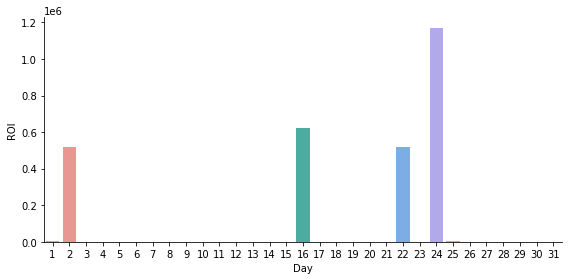

In [ ]:
sns.catplot(x='Day',y='ROI',data=ROI_day,kind='bar',height=4,aspect=2)

## Categorized ROI

### Correlation

In [ ]:
final_df.columns

Index(['imdb_id', 'title', 'original_title', 'date_published', 'duration',
       'revenue', 'year', 'popularity', 'actor_movie_count', 'actor_movie_pop',
       'actress_movie_count', 'actress_movie_pop', 'director_movie_count',
       'director_movie_pop', 'crew_count', 'crew_pop', 'genre_list',
       'genre_count', 'Comedy', 'Crime', 'Drama', 'War', 'Horror', 'Adventure',
       'Animation', 'Action', 'Biography', 'Western', 'Family', 'Thriller',
       'Mystery', 'Musical', 'Fantasy', 'Sci-Fi', 'Romance', 'Documentary',
       'History', 'Sport', 'Music', 'Month', 'Day', 'budget', 'profit', 'ROI',
       'total_votes', 'mean_vote', 'median_vote', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', '

### Correlation vs actor, actress, director popularity

In [ ]:
cast_pop = final_df.loc[:,('actor_movie_pop','actress_movie_pop','director_movie_pop', 'crew_pop','ROI_group')]

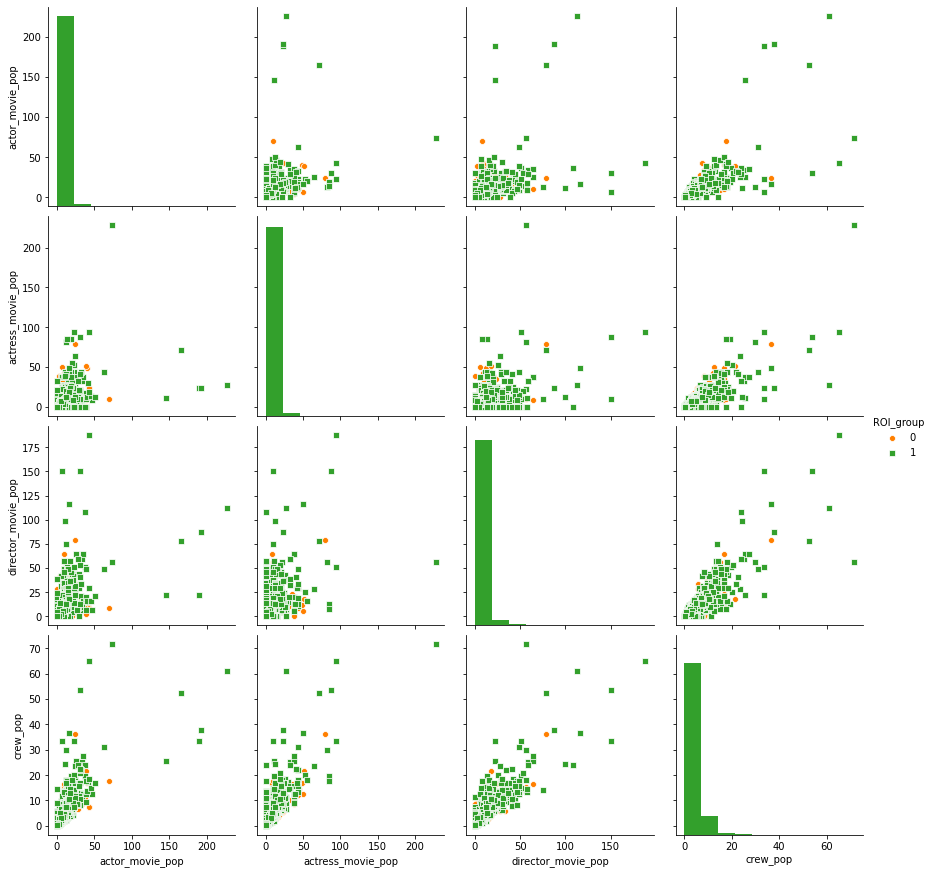

In [ ]:
sns.pairplot(cast_pop,hue="ROI_group",height=3, markers=["o", "s"],palette='Paired_r',diag_kind='hist') 

### correlation vs actor, actress, director count

In [ ]:
cast_count = final_df.loc[:,('actor_movie_count','actress_movie_count','director_movie_count','crew_count','ROI_group')]

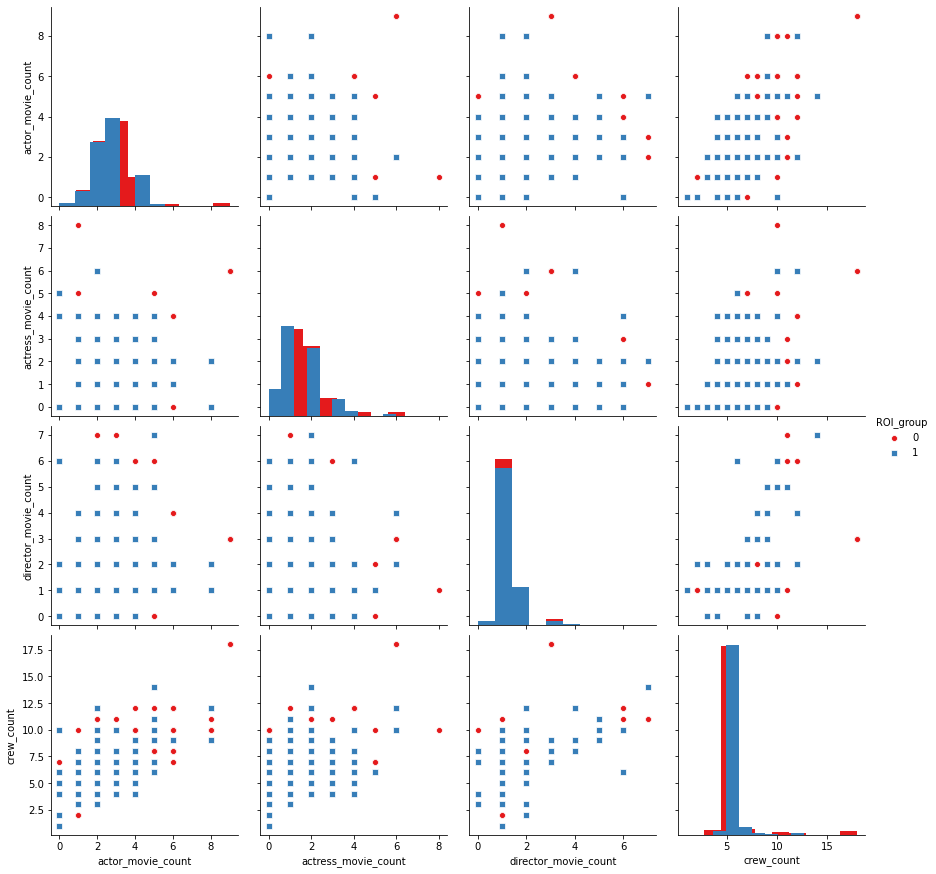

In [ ]:
sns.pairplot(cast_count,hue="ROI_group",height=3, markers=["o", "s"],palette='Set1',diag_kind='hist') 

In [ ]:
cast = final_df.loc[:,('actor_movie_count','actress_movie_count','director_movie_count','crew_count','ROI_group','actor_movie_pop','actress_movie_pop','director_movie_pop', 'crew_pop')]
cast.groupby('ROI_group').agg([np.mean,np.median,lambda x: x.mad(),lambda y: stats.median_absolute_deviation(y),np.std]).rename(columns={'<lambda_0>':'Mean Absolute Deviation','<lambda_1>':'Median Absolute Deviation','std':'Standard Deviation'})

actor_movie_count         ...                  crew_pop                   
                       mean median  ... Median Absolute Deviation Standard Deviation
ROI_group                           ...                                             
0                  2.811911    3.0  ...                  2.141066           2.099657
1                  2.687690    3.0  ...                  1.962650           3.420337

[2 rows x 40 columns]

### Correlation vs popularity, total votes, mean votes, duration, overview_count

In [ ]:
df = final_df.loc[:,('popularity','total_votes', 'mean_vote','duration','overview_count','ROI_group')]

In [ ]:
df.groupby('ROI_group').agg([np.mean,np.median,lambda x: x.mad(),lambda y: stats.median_absolute_deviation(y),np.std]).rename(columns={'<lambda_0>':'Mean Absolute Deviation','<lambda_1>':'Median Absolute Deviation','std':'Standard Deviation'})

popularity            ...            overview_count                   
                mean    median  ... Median Absolute Deviation Standard Deviation
ROI_group                       ...                                             
0           4.694499  3.603447  ...                   31.1346          33.773201
1          10.085935  8.548428  ...                   26.6868          27.194616

[2 rows x 25 columns]

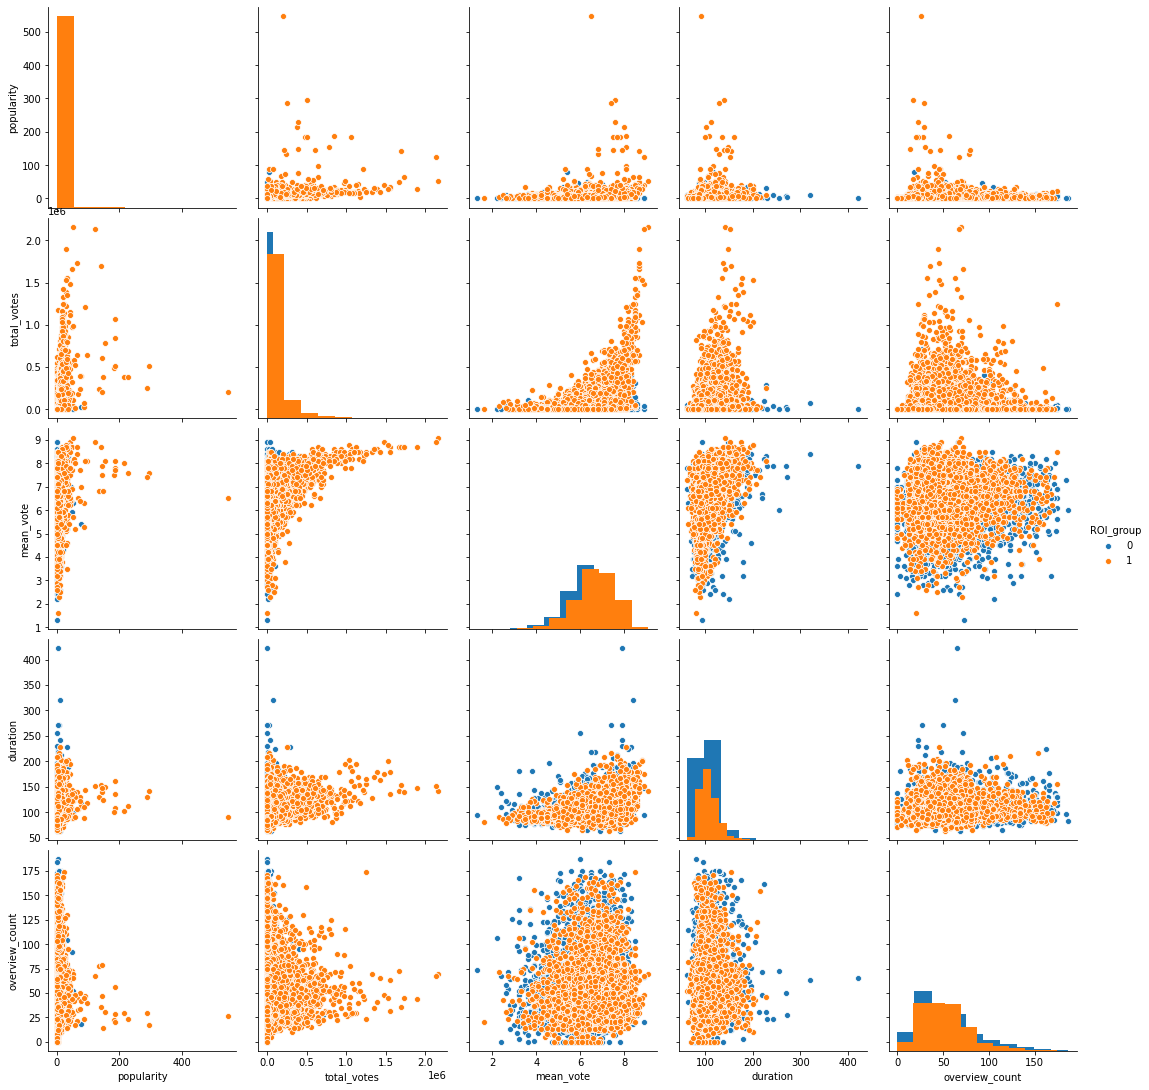

In [ ]:
sns.pairplot(df,hue="ROI_group", palette='tab10',height=3,diag_kind='hist') 

### Correlation vs all gender age group

In [ ]:
all_gender_age_vote = final_df.loc[:,('allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes','ROI_group')]

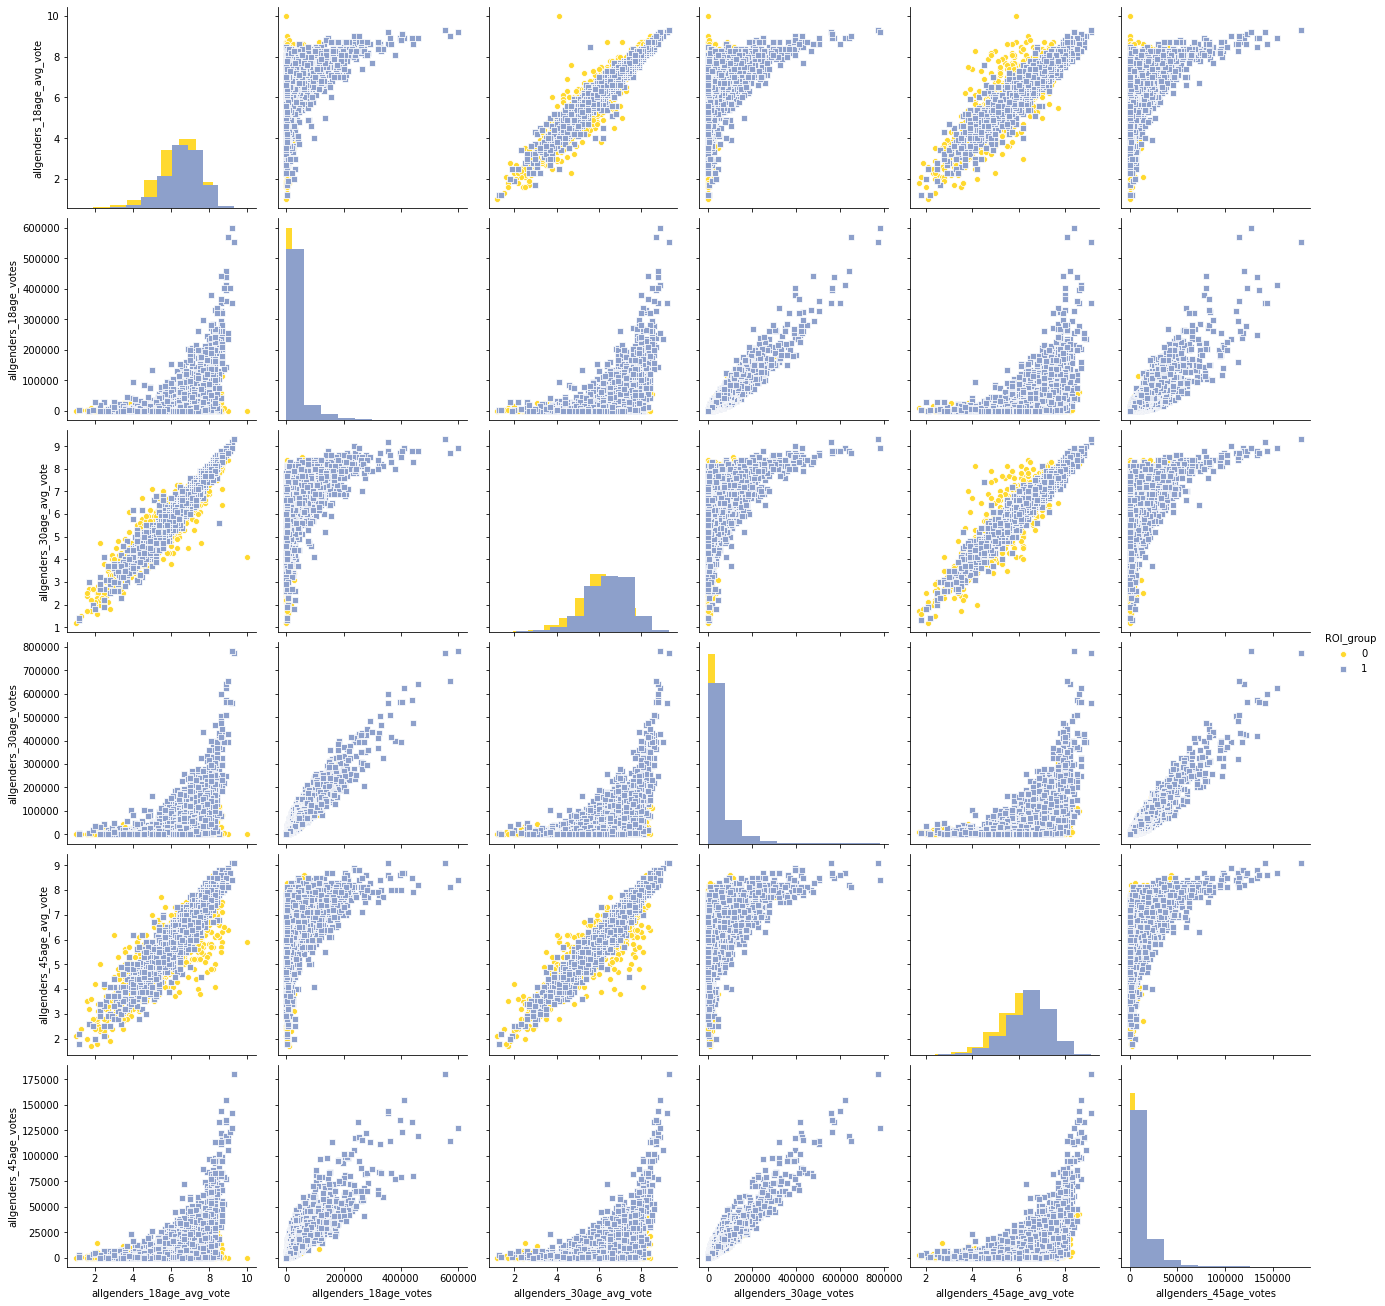

In [ ]:
sns.pairplot(all_gender_age_vote,hue="ROI_group",height=3, markers=["o", "s"],palette='Set2_r',diag_kind='hist') 

### correlation vs male age group

In [ ]:
male_age_vote = final_df.loc[:,('males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes','ROI_group')]

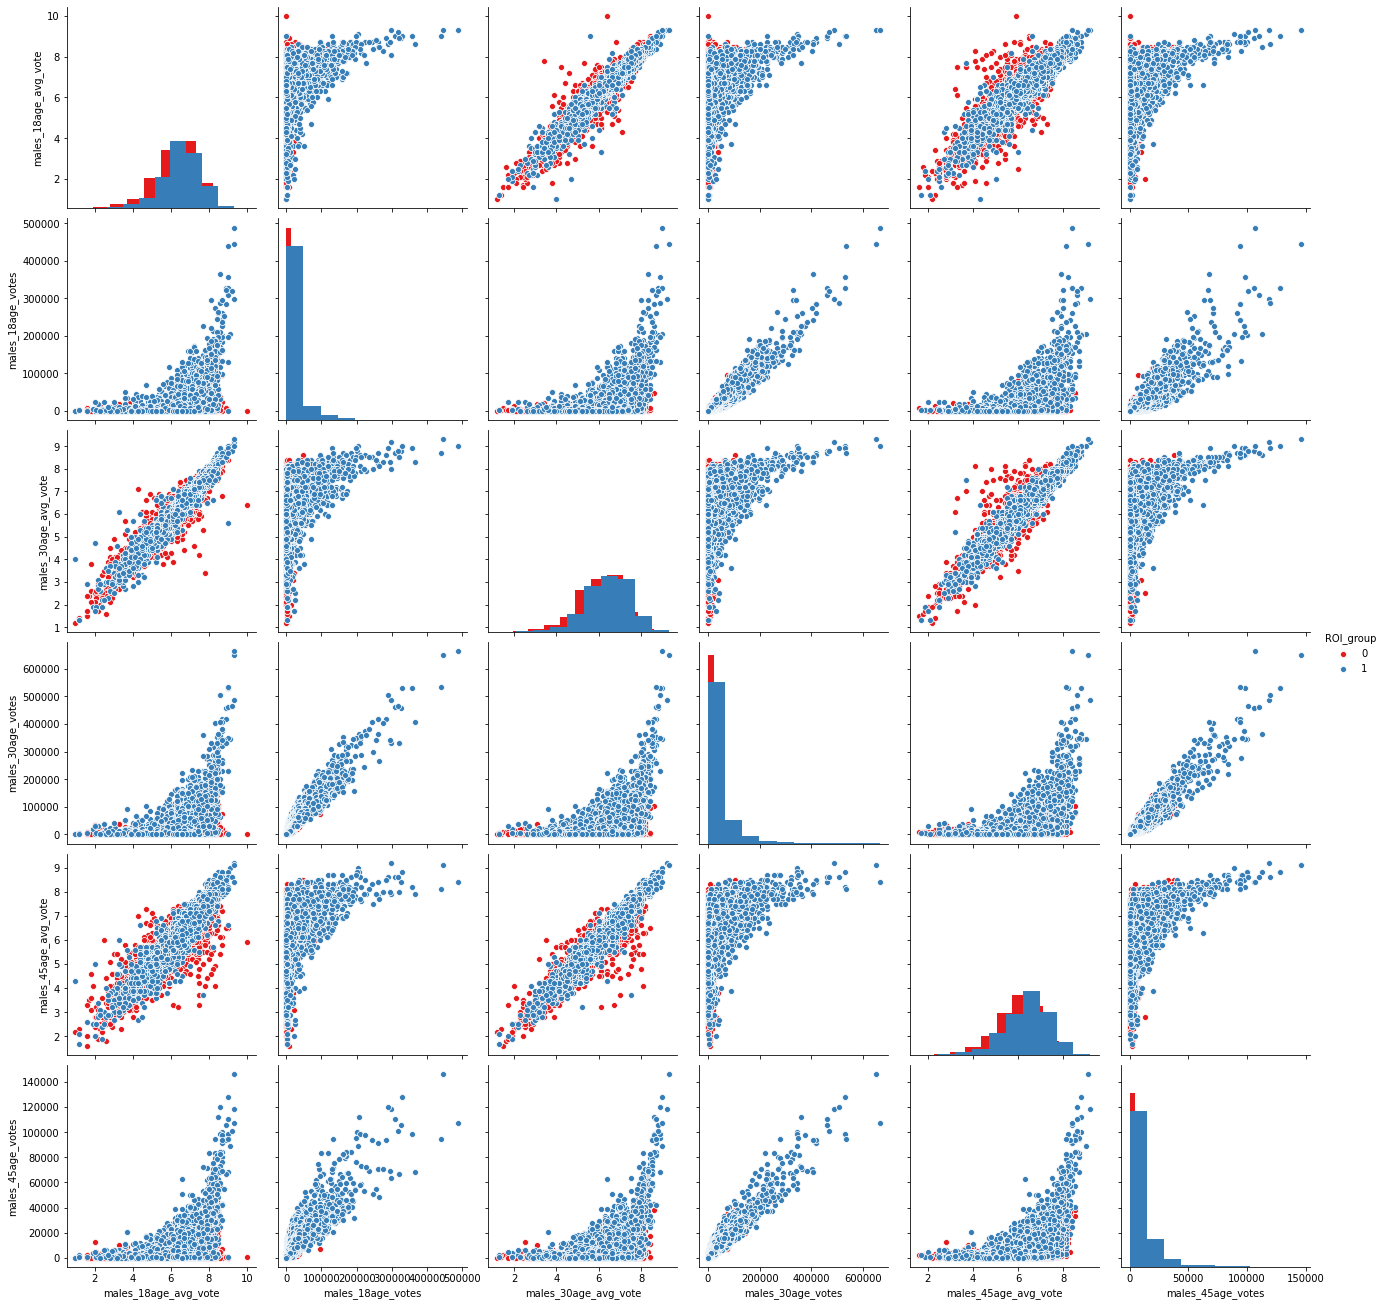

In [ ]:
sns.pairplot(male_age_vote,hue="ROI_group",height=3,palette='Set1',diag_kind='hist') 

### correlation vs female age group

In [ ]:
female_age_vote = final_df.loc[:,('females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes', 'females_45age_avg_vote',
       'females_45age_votes','ROI_group')]

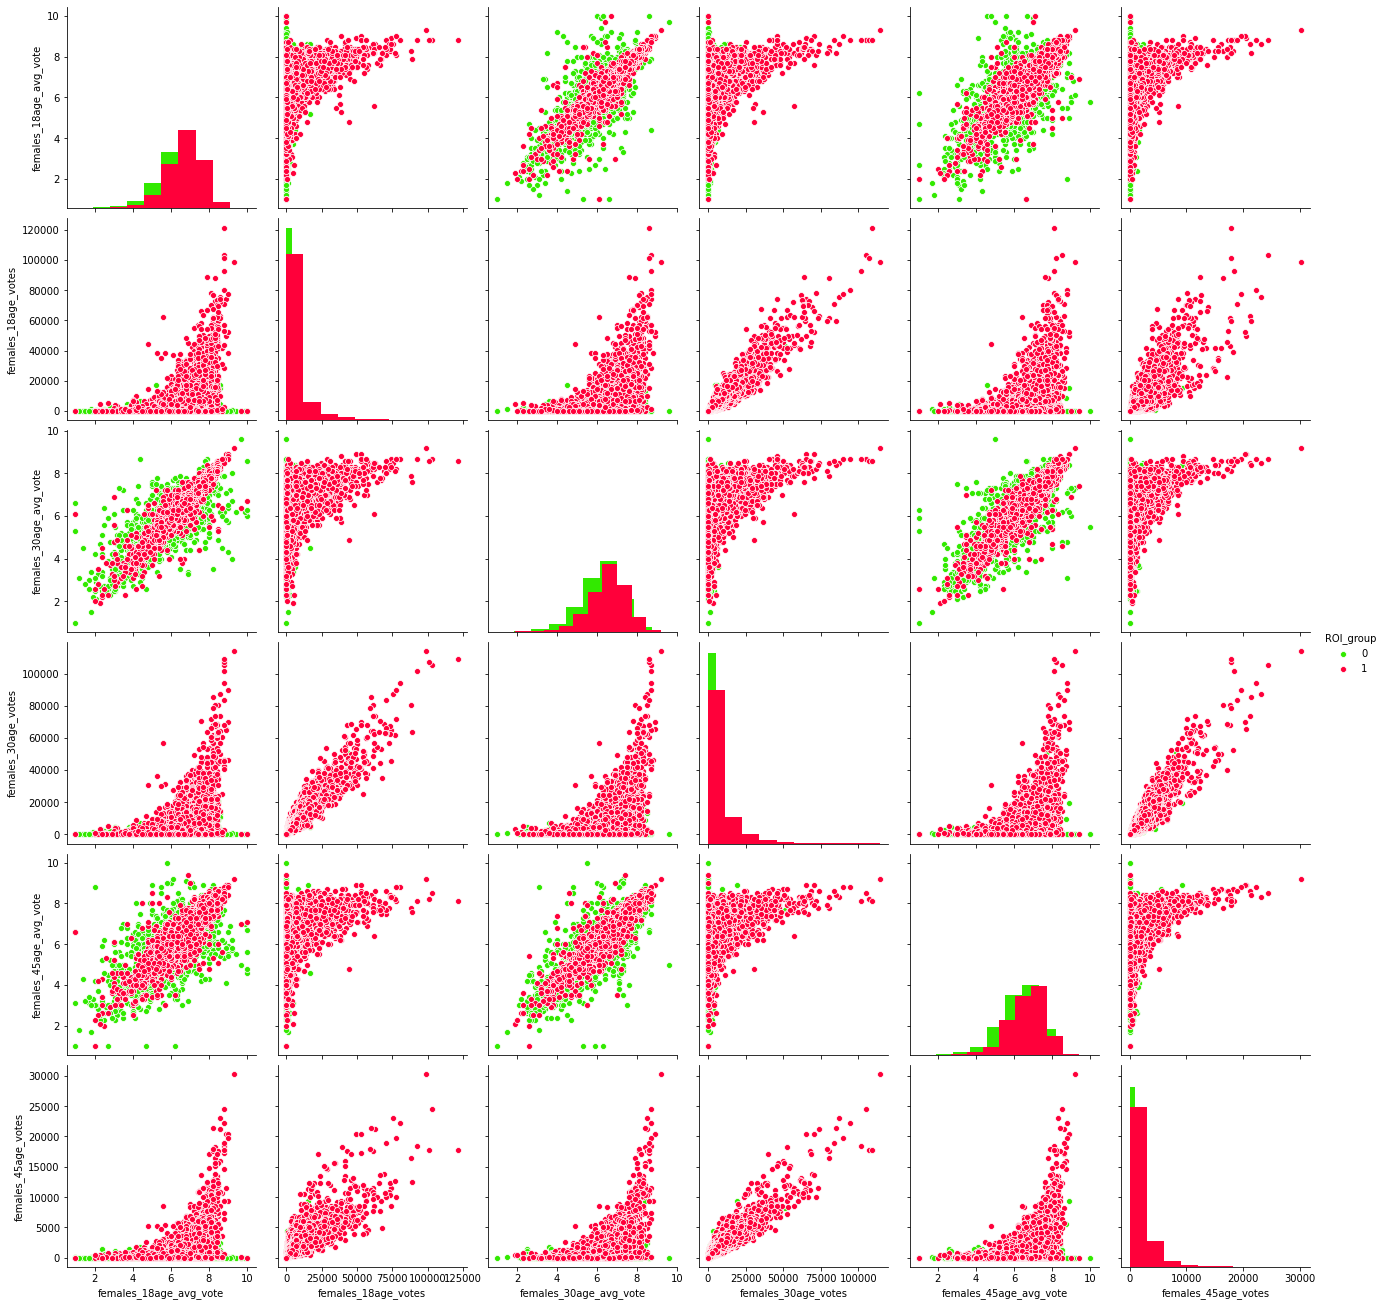

In [ ]:
sns.pairplot(female_age_vote,hue="ROI_group",height=3,palette='prism',diag_kind='hist') 

### correlation vs all age 

In [ ]:
all_age = final_df.loc[:,('males_allages_avg_vote',
       'males_allages_votes','females_allages_avg_vote',
       'females_allages_votes','ROI_group')]

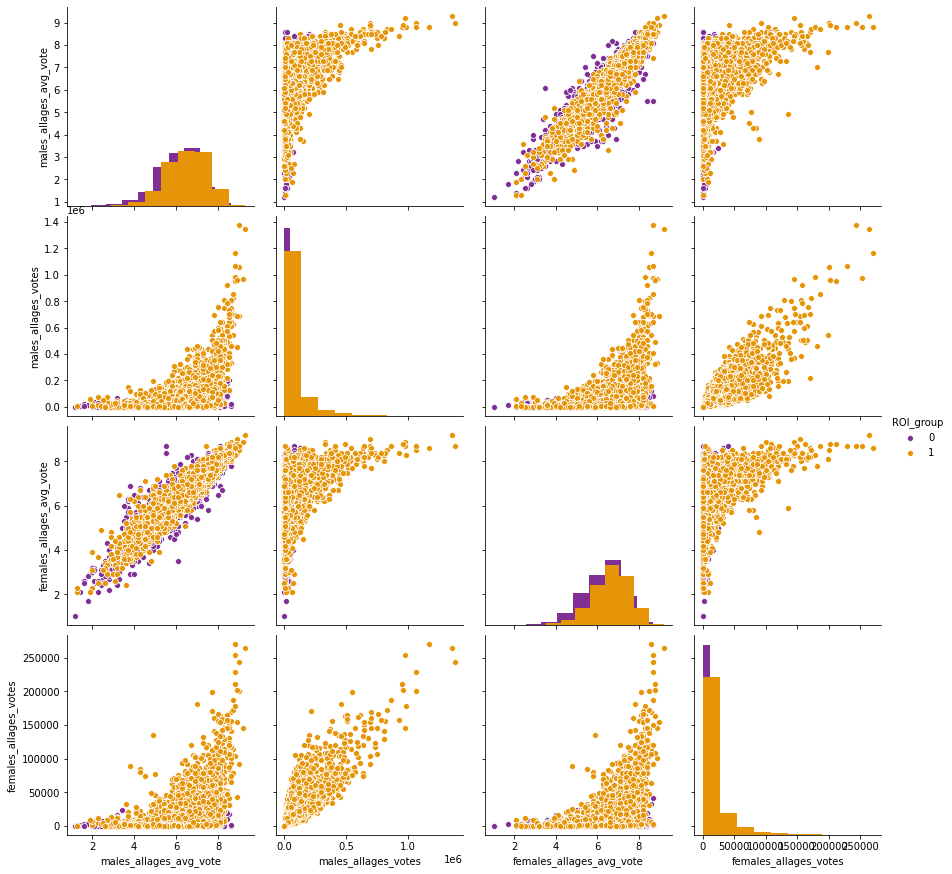

In [ ]:
sns.pairplot(all_age,hue="ROI_group",height=3,palette='CMRmap',diag_kind='hist') 

### correlation vs us/non-us voters

In [ ]:
us_or_non_us = final_df.loc[:,('us_voters_rating',
       'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes','ROI_group')]

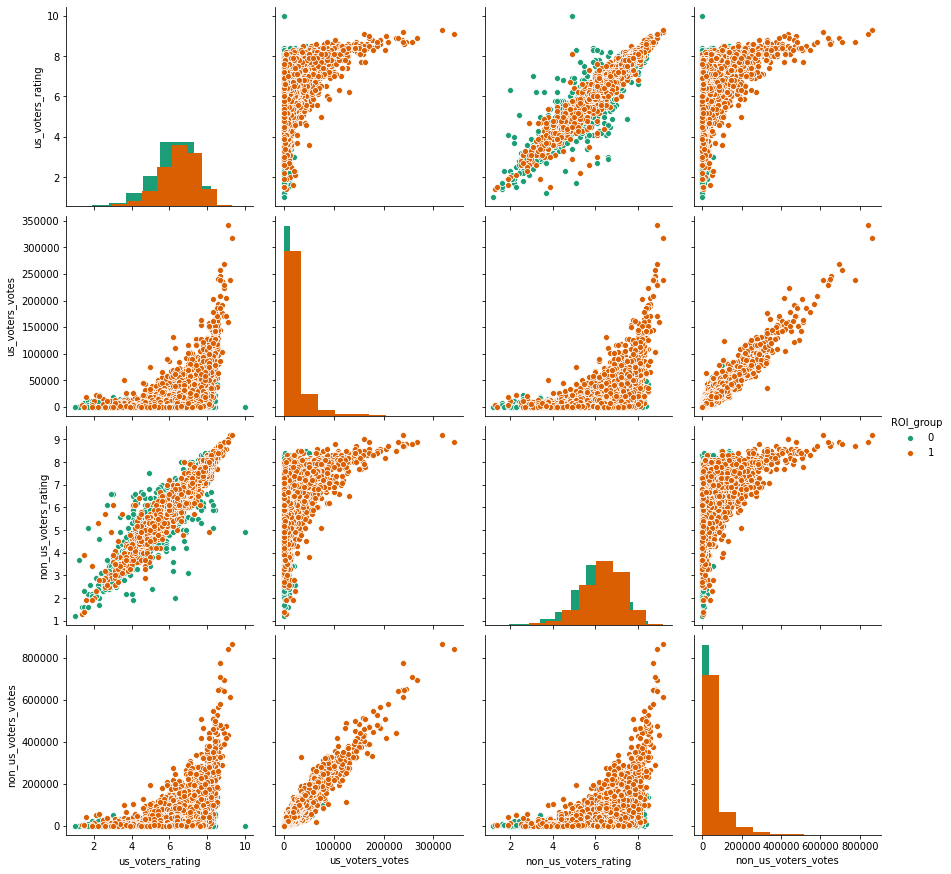

In [ ]:
sns.pairplot(us_or_non_us,hue="ROI_group",height=3,palette='Dark2',diag_kind='hist') 

In [ ]:
# budget_revenue = sns.scatterplot(x='revenue',y='budget',data=final_df[final_df['ROI'] > 0])
# plt.xlabel("Revenue")
# plt.ylabel("Budget")
# plt.title("Budget vs Revenue from 1960 to 2018")
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
# sns.lineplot(x=t.index,y=t.values)

# Genre

### Gerne popular

In [ ]:
genre_point_df

,genre,duration,revenue,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,budget,profit,ROI,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,overview_count,ROI_group,is_original_title,point,Month,Total
0,Comedy,100.483262,5.031181e+07,2.991153,7.240522,1.948828,6.145824,1.248207,6.235306,6.188187,3.446169,7.559155e+10,-7.554124e+10,1599.111546,47812.563845,6.363941,6.339550,6.291200,10791.381396,6.127068,20514.298422,6.068580,5545.797704,6.113199,30139.401004,6.236418,7688.922525,6.086035,16530.125777,6.022956,4554.087996,6.317886,8061.308704,6.385246,2956.572692,6.250167,3754.220708,6.300263,907.585844,6.180727,9441.342659,6.098302,22264.621712,54.212339,0.630320,0.999044,2.796017,"242,300,559,300,502,251,262,337,314,569,238,308",4182
1,Crime,103.957447,3.329642e+07,3.413762,7.609137,1.803078,6.169182,1.178361,6.660027,6.395201,3.560021,1.877850e+10,-1.874520e+10,59716.007535,61379.128112,6.585378,6.673608,6.606225,11966.874378,6.442689,27835.134450,6.362155,7679.742870,6.462789,42130.603440,6.611634,9748.723404,6.433273,23965.962426,6.342236,6522.173834,6.500272,7029.520598,6.555908,2063.870530,6.444092,3558.967406,6.497782,1041.976007,6.481258,11171.316885,6.415392,29956.410140,46.763241,0.472612,1.000000,2.615611,"416,126,410,176,134,116,86,154,189,166,144,92",2209
2,Drama,107.632852,2.695945e+07,3.188748,7.807560,2.000146,6.334236,1.461303,6.261505,6.650197,3.344404,1.542856e+10,-1.540160e+10,69728.440524,43514.688821,6.713380,6.841131,6.722839,9669.355779,6.510509,18453.072438,6.457922,5252.672497,6.514590,27849.664626,6.689623,7137.494389,6.477409,15014.351115,6.413453,4312.868970,6.659350,6867.673808,6.736656,2398.352135,6.595598,3217.284507,6.648841,858.719429,6.532357,7451.705874,6.506909,20785.907156,57.293397,0.366127,0.998980,2.568326,"746,690,726,473,607,613,539,627,548,507,456,329",6861
3,War,121.468900,2.628175e+07,3.052632,6.312450,1.019139,3.720721,1.157895,5.984695,5.229665,3.074565,1.630913e+11,-1.630650e+11,710174.487389,54033.521531,6.961722,7.033493,6.922010,11299.961722,6.744498,22299.071770,6.774163,7230.009569,6.769856,36403.081340,6.880861,9159.674641,6.716746,19192.177033,6.739713,6185.808612,6.958373,6122.502392,6.984689,1988.894737,6.882775,2847.454545,7.035885,938.425837,6.775120,9245.497608,6.746890,25447.449761,54.952153,0.363636,0.995215,2.341536,"13,18,24,29,8,9,5,18,27,23,18,17",209
4,Horror,97.620942,3.199581e+07,2.446073,7.483895,1.615707,7.149032,1.121466,7.874070,5.183246,4.376747,2.773831e+10,-2.770631e+10,406037.053449,50426.408377,5.915393,5.945026,5.796126,10585.375916,5.707853,22711.655497,5.714031,5929.182199,5.715288,33497.200000,5.776859,8021.173822,5.692565,18969.830366,5.680314,5006.104712,5.824293,7128.951832,5.826387,2422.171728,5.776859,3484.766492,5.921466,831.823037,5.823874,9791.608377,5.654031,23922.907853,51.298429,0.536126,1.000000,3.429580,"85,75,75,84,82,70,58,87,100,117,84,38",955
5,Adventure,101.977788,1.209182e+08,3.982416,8.396319,1.711245,6.743722,1.795928,8.844222,7.489588,3.874349,1.590027e+09,-1.469109e+09,169.477860,84635.487737,6.315317,6.293151,6.221703,21685.469227,6.001944,32896.552059,5.931652,8267.437298,6.065248,54469.026377,6.156270,16684.201758,5.963720,27497.121240,5.870430,6944.132346,6.347478,11681.896344,6.410227,4685.486812,6.227256,4996.336881,6.242804,1193.303563,6.133734,14173.950486,6.041925,37675.796391,56.102730,0.650162,0.999

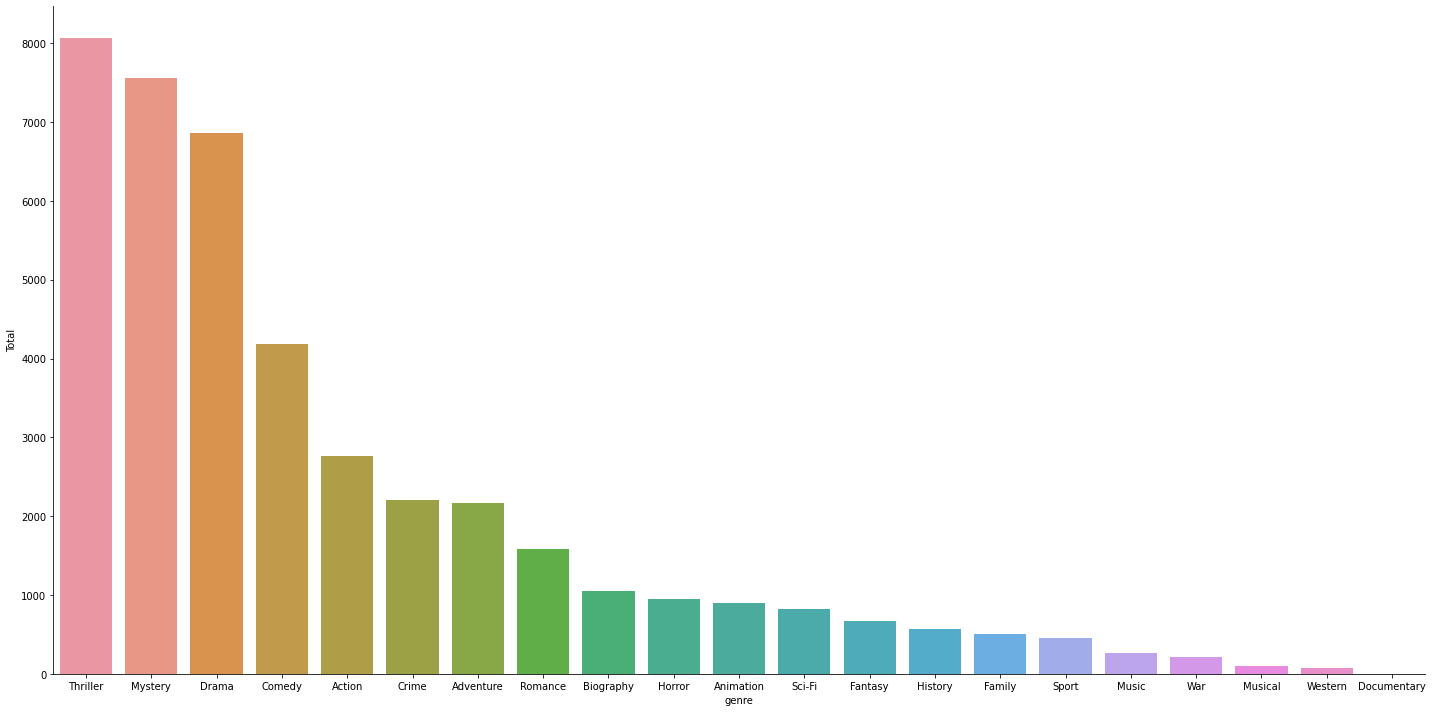

In [ ]:
total = sns.catplot(kind='bar',x='genre', y='Total', data=genre_point_df.sort_values('Total', ascending=False), height=10, aspect=2)

In [ ]:
genre_point_df.drop(17,inplace=True)
genre_point_df.reset_index(drop=True,inplace=True)
genre_point_df

,genre,duration,revenue,actor_movie_count,actor_movie_pop,actress_movie_count,actress_movie_pop,director_movie_count,director_movie_pop,crew_count,crew_pop,budget,profit,ROI,total_votes,mean_vote,median_vote,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,overview_count,ROI_group,is_original_title,point,Month,Total
0,Comedy,100.483262,5.031181e+07,2.991153,7.240522,1.948828,6.145824,1.248207,6.235306,6.188187,3.446169,7.559155e+10,-7.554124e+10,1599.111546,47812.563845,6.363941,6.339550,6.291200,10791.381396,6.127068,20514.298422,6.068580,5545.797704,6.113199,30139.401004,6.236418,7688.922525,6.086035,16530.125777,6.022956,4554.087996,6.317886,8061.308704,6.385246,2956.572692,6.250167,3754.220708,6.300263,907.585844,6.180727,9441.342659,6.098302,22264.621712,54.212339,0.630320,0.999044,2.796017,"242,300,559,300,502,251,262,337,314,569,238,308",4182
1,Crime,103.957447,3.329642e+07,3.413762,7.609137,1.803078,6.169182,1.178361,6.660027,6.395201,3.560021,1.877850e+10,-1.874520e+10,59716.007535,61379.128112,6.585378,6.673608,6.606225,11966.874378,6.442689,27835.134450,6.362155,7679.742870,6.462789,42130.603440,6.611634,9748.723404,6.433273,23965.962426,6.342236,6522.173834,6.500272,7029.520598,6.555908,2063.870530,6.444092,3558.967406,6.497782,1041.976007,6.481258,11171.316885,6.415392,29956.410140,46.763241,0.472612,1.000000,2.615611,"416,126,410,176,134,116,86,154,189,166,144,92",2209
2,Drama,107.632852,2.695945e+07,3.188748,7.807560,2.000146,6.334236,1.461303,6.261505,6.650197,3.344404,1.542856e+10,-1.540160e+10,69728.440524,43514.688821,6.713380,6.841131,6.722839,9669.355779,6.510509,18453.072438,6.457922,5252.672497,6.514590,27849.664626,6.689623,7137.494389,6.477409,15014.351115,6.413453,4312.868970,6.659350,6867.673808,6.736656,2398.352135,6.595598,3217.284507,6.648841,858.719429,6.532357,7451.705874,6.506909,20785.907156,57.293397,0.366127,0.998980,2.568326,"746,690,726,473,607,613,539,627,548,507,456,329",6861
3,War,121.468900,2.628175e+07,3.052632,6.312450,1.019139,3.720721,1.157895,5.984695,5.229665,3.074565,1.630913e+11,-1.630650e+11,710174.487389,54033.521531,6.961722,7.033493,6.922010,11299.961722,6.744498,22299.071770,6.774163,7230.009569,6.769856,36403.081340,6.880861,9159.674641,6.716746,19192.177033,6.739713,6185.808612,6.958373,6122.502392,6.984689,1988.894737,6.882775,2847.454545,7.035885,938.425837,6.775120,9245.497608,6.746890,25447.449761,54.952153,0.363636,0.995215,2.341536,"13,18,24,29,8,9,5,18,27,23,18,17",209
4,Horror,97.620942,3.199581e+07,2.446073,7.483895,1.615707,7.149032,1.121466,7.874070,5.183246,4.376747,2.773831e+10,-2.770631e+10,406037.053449,50426.408377,5.915393,5.945026,5.796126,10585.375916,5.707853,22711.655497,5.714031,5929.182199,5.715288,33497.200000,5.776859,8021.173822,5.692565,18969.830366,5.680314,5006.104712,5.824293,7128.951832,5.826387,2422.171728,5.776859,3484.766492,5.921466,831.823037,5.823874,9791.608377,5.654031,23922.907853,51.298429,0.536126,1.000000,3.429580,"85,75,75,84,82,70,58,87,100,117,84,38",955
5,Adventure,101.977788,1.209182e+08,3.982416,8.396319,1.711245,6.743722,1.795928,8.844222,7.489588,3.874349,1.590027e+09,-1.469109e+09,169.477860,84635.487737,6.315317,6.293151,6.221703,21685.469227,6.001944,32896.552059,5.931652,8267.437298,6.065248,54469.026377,6.156270,16684.201758,5.963720,27497.121240,5.870430,6944.132346,6.347478,11681.896344,6.410227,4685.486812,6.227256,4996.336881,6.242804,1193.303563,6.133734,14173.950486,6.041925,37675.796391,56.102730,0.650162,0.999

Text(0.5, 1.0, 'Genre Popularity')

<Figure size 432x288 with 0 Axes>

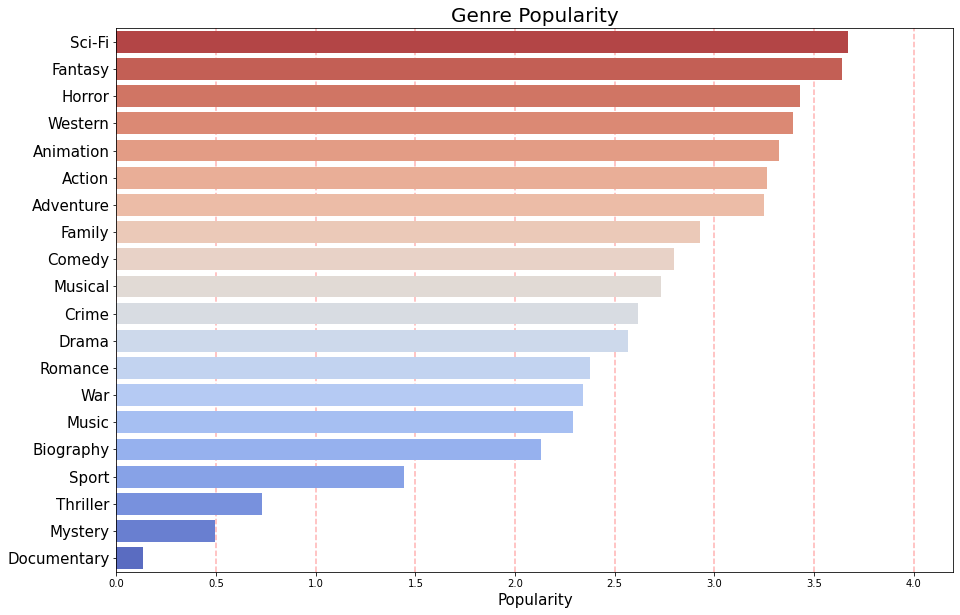

In [ ]:
# genre_point_df.sort_values('point', ascending=True).plot.barh(x='genre', y='point', figsize=(15,10))
plt.clf()
plt.figure(figsize=(15,10))
f = sns.barplot(x='point', y='genre',data=genre_point_df.sort_values('point', ascending=False), palette="coolwarm_r",zorder=2)
for x in f.get_xticks():
        f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)
f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
f.set_ylabel(None)
f.set_xlabel('Popularity',fontsize=15)
f.set_title('Genre Popularity', fontsize=20)

## Genre vs Month

In [ ]:
# genre_month = genre_point_df[['genre','Month']].copy().sort_values('Month')
# month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
#          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# month_count = genre_month[['genre','Month']]['Month'].str.split(',', expand=True)
# month_count = month_count.astype('int64')
# genre_month.drop('Month', axis=1, inplace=True)
# genre_month[month] = month_count
# genre_month.reset_index(drop=True, inplace=True)
# genre_month.sort_index(inplace=True)

In [ ]:
# g_m_df = genre_month.copy()
# g_m_df = g_m_df.set_index('genre')
# plt.clf()
# p_row=10
# p_col=2
# fig, axes = plt.subplots(nrows=p_row, ncols=p_col, figsize=(20,50))
# r = 0
# c = 0
# # sns.set(font_scale = 2)
# for i, row in g_m_df.iterrows():
#     temp = pd.DataFrame(row).reset_index()  
#     g=sns.barplot(x='index', y=temp.columns.values[1], data=temp, ax=axes[r,c], palette="muted",zorder=2)
#     for y in g.get_yticks():
#         g.axhline(y=y, ls='--', c='red', alpha=0.3,zorder=1)
#     g.set_xticklabels(g.get_xmajorticklabels(),rotation=0, fontsize=15)
#     g.set_yticklabels(g.get_yticks(),rotation=0, fontsize=15)
#     g.set_xlabel(None)
#     g.set_ylabel('Movies count',fontsize=15)
#     g.set_title(i,fontsize=25)
    
#     if c < p_col-1:
#         c += 1
#     else:
#         r += 1
#         c = 0
# # axes[10,1].set_axis_off()
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
# plt.show()

## Genre Movies vs Month

In [ ]:
# g_m_df = genre_month.copy()
# g_m_df = g_m_df.set_index('genre').T
# plt.clf()
# p_row=6
# p_col=2
# fig, axes = plt.subplots(nrows=p_row, ncols=p_col, figsize=(20,50))
# r = 0
# c = 0
# # sns.set(font_scale = 2)
# for i, row in g_m_df.iterrows():
#     temp = pd.DataFrame(row).reset_index() 
#     g=sns.barplot(x=temp.columns.values[1], y='genre', data=temp.sort_values(temp.columns.values[1], ascending=False), ax=axes[r,c], palette="coolwarm_r", orient = 'h',zorder=2)
#     for x in g.get_xticks():
#         g.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)
#     g.set_xticklabels(g.get_xticks(),rotation=0, fontsize=15)
#     g.set_yticklabels(g.get_ymajorticklabels(),rotation=0, fontsize=15)
#     g.set_xlabel('Movies count',fontsize=15)
#     g.set_ylabel(None)
#     g.set_title(i,fontsize=20)
    
#     if c < p_col-1:
#         c += 1
#     else:
#         r += 1
#         c = 0
# # axes[10,1].set_axis_off()
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
# plt.show()

## Genre vs duration

In [ ]:
# plt.clf()
# plt.figure(figsize=(15,10))
# f = sns.barplot(x='duration', y='genre',data=genre_point_df.sort_values('duration', ascending=False), palette="coolwarm_r",zorder=2)
# f.set(xlim=(85,125))
# for x in f.get_xticks():
#         f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

# f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
# f.set_ylabel(None)
# f.set_xlabel('Duration',fontsize=15)
# f.set_title('Genre Duration', fontsize=20)

## Genre vs budget

In [ ]:
# plt.clf()
# plt.figure(figsize=(15,10))
# f = sns.barplot(x='budget', y='genre',data=genre_point_df.sort_values('budget', ascending=False), palette="coolwarm_r",zorder=2)
# f.set(xlim=(0,3*1e11))
# f.set_xticklabels(range(0,300000000000,1000))
# for x in f.get_xticks():
#         f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

# f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
# f.set_ylabel(None)
# f.set_xlabel('Budget',fontsize=15)
# f.set_title('Genre Budget', fontsize=20)

## Genre vs revenue

In [ ]:
# plt.clf()
# plt.figure(figsize=(15,10))
# f = sns.barplot(x='revenue', y='genre',data=genre_point_df.sort_values('revenue', ascending=False), palette="coolwarm_r",zorder=2)
# f.set(xlim=(0,1.75*1e8))
# for x in f.get_xticks():
#         f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

# f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
# f.set_ylabel(None)
# f.set_xlabel('Revenue',fontsize=15)
# f.set_title('Genre Revenue', fontsize=20)

## Genre Vs vote

In [ ]:
# plt.clf()
# plt.figure(figsize=(15,10))
# f = sns.barplot(x='mean_vote', y='genre',data=genre_point_df.sort_values('mean_vote', ascending=False), palette="coolwarm_r",zorder=2)
# f.set(xlim=(5.6,7.2))
# for x in f.get_xticks():
#         f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

# f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
# f.set_ylabel(None)
# f.set_xlabel('Average Vote',fontsize=15)
# f.set_title('Genre Average Vote', fontsize=20)

## Genre vs female

In [ ]:
# plt.clf()
# plt.figure(figsize=(15,10))
# f = sns.barplot(x='females_allages_votes', y='genre',data=genre_point_df.sort_values('females_allages_votes', ascending=False), palette="coolwarm_r",zorder=2)
# f.set(xlim=(2500,17500))
# for x in f.get_xticks():
#         f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

# f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
# f.set_ylabel(None)
# f.set_xlabel('Vote',fontsize=15)
# f.set_title('Genre Female Vote', fontsize=20)

In [ ]:
# plt.clf()
# plt.figure(figsize=(15,10))
# f = sns.barplot(x='females_allages_avg_vote', y='genre',data=genre_point_df.sort_values('females_allages_avg_vote', ascending=False), palette="coolwarm_r",zorder=2)
# f.set(xlim=(5.5,7))
# for x in f.get_xticks():
#         f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

# f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
# f.set_ylabel(None)
# f.set_xlabel('Average Vote',fontsize=15)
# f.set_title('Genre Female Average Vote', fontsize=20)

## Genre vs male

In [ ]:
# plt.clf()
# plt.figure(figsize=(15,10))
# f = sns.barplot(x='males_allages_votes', y='genre',data=genre_point_df.sort_values('males_allages_votes', ascending=False), palette="coolwarm_r",zorder=2)
# f.set(xlim=(10000,100000))
# for x in f.get_xticks():
#         f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

# f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
# f.set_ylabel(None)
# f.set_xlabel('Vote',fontsize=15)
# f.set_title('Genre Male Vote', fontsize=20)

In [ ]:
# plt.clf()
# plt.figure(figsize=(15,10))
# f = sns.barplot(x='males_allages_avg_vote', y='genre',data=genre_point_df.sort_values('males_allages_avg_vote', ascending=False), palette="coolwarm_r",zorder=2)
# f.set(xlim=(5.5,7))
# for x in f.get_xticks():
#         f.axvline(x=x, ls='--', c='red', alpha=0.3,zorder=1)

# f.set_yticklabels(f.get_ymajorticklabels(), fontsize=15)
# f.set_ylabel(None)
# f.set_xlabel('Average Vote',fontsize=15)
# f.set_title('Genre Male Average Vote', fontsize=20)